In [51]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
!ls "/content/gdrive/My Drive/img"

normal	pneumonia_bacteria  pneumonia_virus


In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [0]:
DATADIR="/content/gdrive/My Drive/img/"
CATEGORIES=["normal", "pneumonia_bacteria", "pneumonia_virus"]


IMG_SIZE=200
training_data = []

def create_training_data():

    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) )
                rgb_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(rgb_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                print(e)

create_training_data()

In [0]:
import random

In [0]:
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])
    
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) 
y=np.array(y)

1
2
0
1
2
2
1
0
0
1


In [0]:
import pickle

In [0]:
pickle_out = open("/content/gdrive/My Drive/covid-19.pickle","wb")
pickle.dump(X, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("/content/gdrive/My Drive/covid-19-Label.pickle","wb")
pickle.dump(y, pickle_out, protocol=4)
pickle_out.close()   

print(X[0])

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [37 37 37]
  [39 39 39]
  [38 38 38]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [37 37 37]
  [39 39 39]
  [40 40 40]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [37 37 37]
  [39 39 39]
  [40 40 40]]

 ...

 [[13 13 13]
  [12 12 12]
  [13 13 13]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 [[13 13 13]
  [16 16 16]
  [15 15 15]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 5  5  5]]

 [[13 13 13]
  [17 17 17]
  [14 14 14]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 5  5  5]]]


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD

In [0]:
model = Sequential()

model.add(Conv2D(32, (7, 7), input_shape=(200, 200, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Conv2D(64, (7, 7),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(32, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(29,activation='softmax'))
opt = SGD(lr=0.01)
   
model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            
            metrics=['acc']*100)

history=model.fit(X, y,batch_size=32, epochs=10, validation_split=0.01)

model.save('/content/gdrive/My Drive/covid-19.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 5782 samples, validate on 59 samples
Epoch 1/10
5782/5782 [==============================] - 13s 2ms/sample - loss: 2.1008 - acc: 0.5969 - val_loss: 0.8607 - val_acc: 0.5593
Epoch 2/10
5782/5782 [==============================] - 6s 1ms/sample - loss: 0.6809 - acc: 0.7010 - val_loss: 0.5922 - val_acc: 0.6441
Epoch 3/10
5782/5782 [==============================] - 6s 1ms/sample - loss: 0.5890 - acc: 0.7503 - val_loss: 0.4563 - val_acc: 0.7797
Epoch 4/10
5782/5782 [==============================] - 6s 1ms/sample - loss: 0.5617 - acc: 0.7537 - val_loss: 0.6577 - val_acc: 0.7119
Epoch 5/10
5782/5782 [==============================] - 6s 1ms/sample - loss: 0.5463 - acc: 0.7653 - val_loss: 0.4653 - val_acc: 0.7627
Epoch 6/10
5782/5782 [==============================] - 6s 1ms/sample - loss: 0.5481 - acc: 0.7650 - val_loss: 0.5504 - val_acc: 0.7458
Epoch 7/10
5782/5782 [==============================] - 

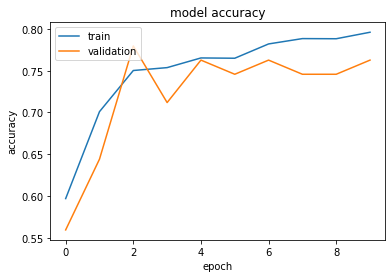

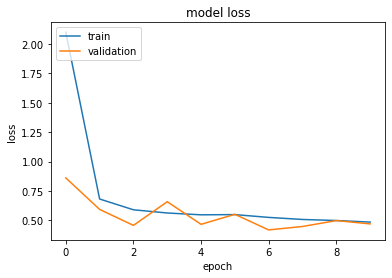

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1


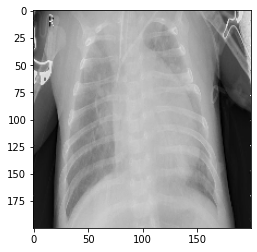

In [0]:
# img=cv2.imread('/content/gdrive/My Drive/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
img=cv2.imread('/content/gdrive/My Drive/img/pneumonia_virus/person1_virus_7.jpeg')
rgb_array = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
new_array = cv2.resize(rgb_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                
img=tf.cast(new_array,tf.float32)
plt.imshow(new_array)

# z=np.array(img).reshape(-1,200,200,1)
z = np.array(new_array).reshape(-1,200,200,3)
#z=z/255.0
q=model.predict([z])[0]
print(np.argmax(q))

In [0]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter = tf.lite.TFLiteConverter.from_keras_model_file("/content/gdrive/My Drive/covid-19.model")
tflite_model = converter.convert()

INFO:tensorflow:Froze 14 variables.
INFO:tensorflow:Converted 14 variables to const ops.


In [0]:

open("/content/gdrive/My Drive/covid-19.tflite", "wb").write(tflite_model)